In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

cities_r2.csv



In [2]:
import os
os.getcwd()
cities = pd.read_csv("../input/cities_r2.csv")

In [3]:
cities.head(5)

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [4]:
cities.info()
## -> No null values present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 22 columns):
name_of_city                      493 non-null object
state_code                        493 non-null int64
state_name                        493 non-null object
dist_code                         493 non-null int64
population_total                  493 non-null int64
population_male                   493 non-null int64
population_female                 493 non-null int64
0-6_population_total              493 non-null int64
0-6_population_male               493 non-null int64
0-6_population_female             493 non-null int64
literates_total                   493 non-null int64
literates_male                    493 non-null int64
literates_female                  493 non-null int64
sex_ratio                         493 non-null int64
child_sex_ratio                   493 non-null int64
effective_literacy_rate_total     493 non-null float64
effective_literacy_rate_male      493 non-n

In [5]:
cities.shape

(493, 22)

In [6]:
# List no. of unique states
print(cities['state_name'].unique())
print(len(cities['state_name'].unique()))

print(cities['dist_code'].unique())
print(len(cities['dist_code'].unique()))

['PUNJAB' 'MAHARASHTRA' 'ANDHRA PRADESH' 'JHARKHAND' 'TRIPURA'
 'UTTAR PRADESH' 'GUJARAT' 'MIZORAM' 'RAJASTHAN' 'TAMIL NADU' 'KERALA'
 'HARYANA' 'CHHATTISGARH' 'JAMMU & KASHMIR' 'BIHAR' 'WEST BENGAL'
 'KARNATAKA' 'ORISSA' 'MADHYA PRADESH' 'NCT OF DELHI' 'CHANDIGARH'
 'UTTARAKHAND' 'ASSAM' 'NAGALAND' 'MANIPUR ' 'PUDUCHERRY'
 'ANDAMAN & NICOBAR ISLANDS' 'MEGHALAYA' 'HIMACHAL PRADESH']
29
[ 9  7  1 24 21 15 26  3 47  5 11 12 44  6  2  4 13 22 14 29 33 19 60 49  8
 62 39 27 30 20 54 18 10 17 23 50 38 16 28 31 32 99 59 70 46 41 34 64 52 57
 25 63 37 35 71 36 61 68 65 48 66]
61


In [7]:
# Population at state level
population_state = cities[['state_name','population_total']].groupby('state_name').sum().sort_values('population_total',ascending=False)
print(population_state)

                           population_total
state_name                                 
MAHARASHTRA                        37722136
UTTAR PRADESH                      25302925
ANDHRA PRADESH                     18171615
WEST BENGAL                        18063509
GUJARAT                            17835049
KARNATAKA                          15799896
TAMIL NADU                         13879395
NCT OF DELHI                       13481997
MADHYA PRADESH                     11023091
RAJASTHAN                          10443016
BIHAR                               6714516
HARYANA                             5952223
PUNJAB                              5821876
JHARKHAND                           4278259
CHHATTISGARH                        3137918
ORISSA                              3003234
KERALA                              2755973
JAMMU & KASHMIR                     1804987
ASSAM                               1391154
UTTARAKHAND                         1340397
CHANDIGARH                      

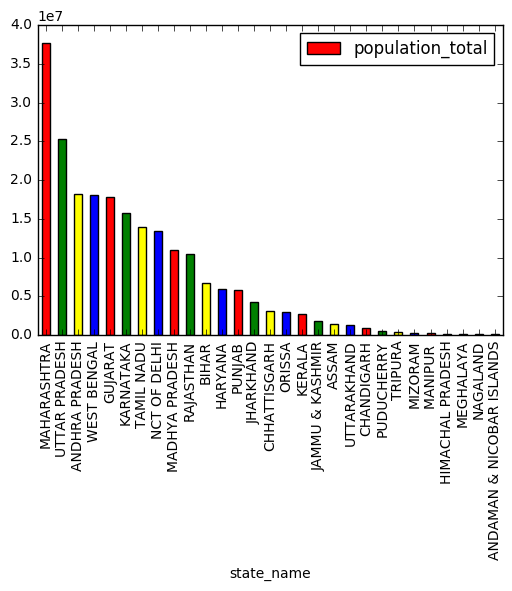

In [8]:
colr = ['red','green','yellow','blue']
population_state.plot(kind='bar',color=colr)

In [9]:
# Top 5 cities with highest female population
cities[['name_of_city','population_female']].sort_values(by='population_female',ascending=False).head(5)
# -> Its Mumbai and Delhi at top

,name_of_city,population_female
185,Greater Mumbai,5741632
141,Delhi,5136473
72,Bengaluru,4024671
184,Greater Hyderabad,3309168
7,Ahmadabad,2634716


In [1]:
# Top 5 states with highest literacy rate 
## Pending if any one can help would be great 
#cities[['state_name','effective_literacy_rate_female']].groupby('state_name').sum().apply()

In [3]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
import pandas as pd

# Assuming you have a DataFrame called 'population_state' with the data

# Example data
data = {'State': ['State A', 'State B', 'State C', 'State D'],
        'Population': [10, 15, 8, 12]}
population_state = pd.DataFrame(data)

# Perform hierarchical clustering
linkage_matrix = hierarchy.linkage(population_state['Population'], method='ward')

# Plot dendrogram
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=population_state['State'])

# Show the plot
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Distance')
plt.show()


ValueError: Length n of condensed distance matrix 'y' must be a binomial coefficient, i.e.there must be a k such that (k \choose 2)=n)!